# Exploratory Data Analysis

### Code Authors:
Eimaan Saqib

Harris Ahmad

In [235]:
import pandas as pd
import numpy as np
from itertools import chain
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
# making the title column as index since it is unique for every row
df = pd.read_csv('dataset.csv')
# resetting the index so it starts from 1
df.index = np.arange(1, len(df) + 1)
# dropping unnamed columns that have nan as their only value
df.drop(['Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36'], axis=1, inplace=True)
df.rename(columns={'strong_janguage':'strong_language'}, inplace=True)

## Data Cleaning & Preprocessing

In [237]:
# dropping all rows with nan values
df = df.dropna(axis=0)

In [238]:
def col_unique_count(col: pd.Series, ordered=False) -> dict:
    temp = col.to_list()
    temp = [list(t.split(',')) for t in temp]
    temp = list(chain.from_iterable(temp))
    temp = [t.strip() for t in temp]

    count = {}
    for t in temp:
        if t in count:
            count[t] += 1
        else:
            count[t] = 1
    # if sorted flag is true, sort dict by values (descending)
    if ordered:
        count = dict(sorted(count.items(), key=lambda item: item[1], reverse=True))
    return count

#### Classifying games according to genres.
Every unique genre would be on the x-axis and the count of each would be on the y-axis.
Notice how every genre is a non-atomic value meaning that it could be divided into multiple genres (simplified).

* some genres are vague to a great degree
* since there are a lot of redundant values, we can select top 10 most popular genres

In [239]:
# this function returns the unique count of genres in 
genre_count = col_unique_count(df['genres'], True)

In [240]:
genre_count

{'Action': 540,
 'General': 440,
 'Shooter': 289,
 'Action Adventure': 280,
 'Platformer': 212,
 'Arcade': 201,
 'First-Person': 182,
 'Adventure': 170,
 '2D': 170,
 'Role-Playing': 164,
 '3D': 153,
 'Simulation': 131,
 'Sports': 103,
 'Strategy': 98,
 'Team': 90,
 'Miscellaneous': 90,
 '"Shoot-Em-Up"': 88,
 'Virtual': 82,
 'Individual': 81,
 '2DAction': 78,
 'Racing': 75,
 'Action RPG': 74,
 'Open-World': 74,
 'Third-Person': 72,
 'Fighting': 72,
 'Turn-Based': 66,
 'Automobile': 65,
 '"Beat-Em-Up"': 65,
 'Puzzle': 58,
 'ArcadeAction': 57,
 'GeneralAction Adventure': 56,
 'Survival': 55,
 'AutomobileRacing': 52,
 'Japanese-Style': 47,
 'Real-Time': 47,
 'Action RPGRole-Playing': 43,
 'Combat': 40,
 'Rhythm': 34,
 'GeneralAdventure': 32,
 'Compilation': 31,
 '3DAction': 30,
 'First-PersonAdventure': 30,
 'Sim': 29,
 'Vertical': 28,
 'Virtual Life': 28,
 'Party / Minigame': 27,
 'Tactics': 26,
 'Open-WorldAction Adventure': 25,
 'Vehicle': 24,
 'Tactical': 24,
 'Music': 24,
 'TacticalAc

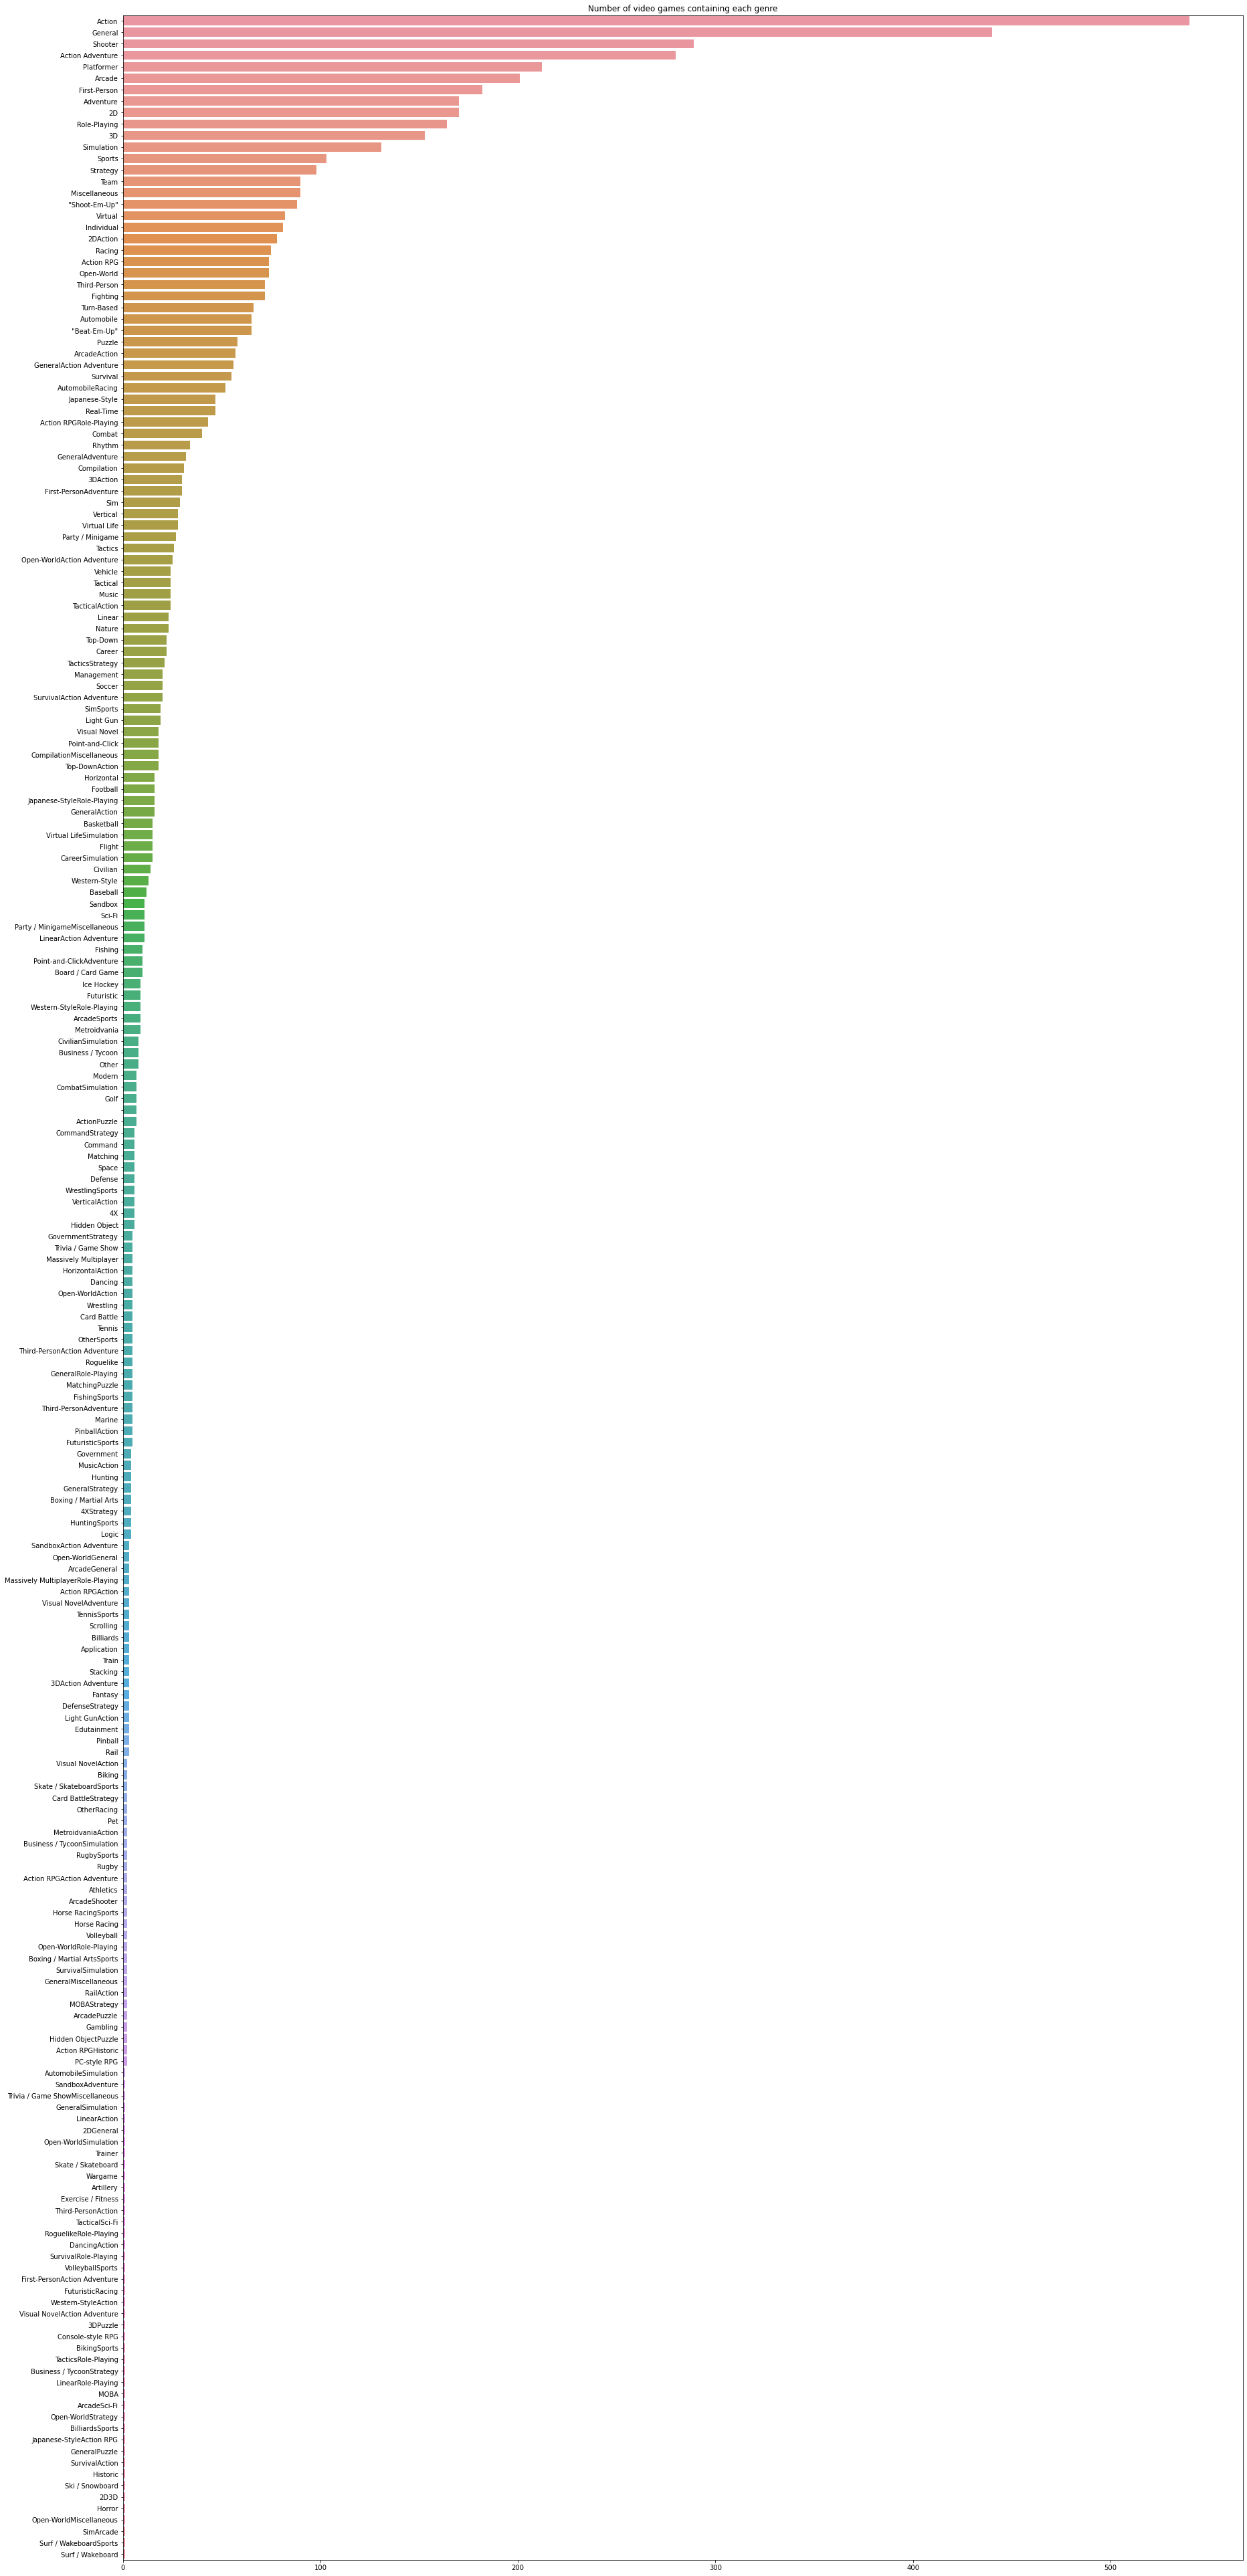

In [241]:
plt.figure(figsize=(30,70))
y = list(genre_count.keys())
x = list(genre_count.values())
sns.barplot(x=x, y=y, orient='h')
plt.title('Number of video games containing each genre')
plt.show()

How many games do developers on average release and what is their mean rating? Do developers with more games have a higher mean rating?

In [242]:
developer_count = col_unique_count(df['developers'], True)
# pprint(developer_count)
developer_count

{'Hamster': 23,
 'Maxis': 22,
 'Square Enix': 21,
 'Bandai Namco Games': 20,
 'Kemco': 14,
 'SNK': 14,
 'Ubisoft': 12,
 'Capcom': 12,
 'Inc.': 12,
 'Sega': 10,
 'Sony Interactive Entertainment': 10,
 'THQ Nordic': 9,
 'Electronic Arts': 9,
 'Nippon Ichi Software': 9,
 'Konami': 9,
 'Bungie': 9,
 'Milestone S.r.l': 8,
 'Maximum Games': 8,
 'Ryu ga Gotoku Studios': 8,
 'Sometimes You': 8,
 'Ubisoft Montreal': 7,
 'Codemasters': 7,
 'WayForward': 7,
 'Bigben Interactive': 7,
 'Wales Interactive': 6,
 'Compile Heart': 6,
 'Visual Concepts': 6,
 'Telltale Games': 6,
 '704Games': 6,
 'Steel Wool Games': 6,
 'M2': 6,
 'ADK': 6,
 'Cyanide': 5,
 'Ubisoft Paris': 5,
 '5pb': 5,
 'Survios': 5,
 'GameMill Entertainment': 5,
 'LLC': 5,
 '3DClouds': 5,
 'Saber Interactive': 5,
 'Atlus': 5,
 'Koei Tecmo Games': 5,
 'Omega Force': 5,
 'Arc System Works': 5,
 'Spike Chunsoft': 5,
 'Outright Games': 5,
 'Bungie Software': 5,
 'TT Games': 5,
 'Plug In Digital': 5,
 'UIG Entertainment': 5,
 'Rainbow Studio

In [243]:
user_ratings = {}
for developer in developer_count.keys():
    avg = np.mean(df[df['developers'].str.contains(developer)]['users_score'])
    user_ratings[developer] = avg
user_ratings

C:\Users\User\AppData\Local\Temp\ipykernel_12696\1166301347.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  avg = np.mean(df[df['developers'].str.contains(developer)]['users_score'])


{'Hamster': 0.33043478260869563,
 'Maxis': 0.8136363636363636,
 'Square Enix': 6.773684210526315,
 'Bandai Namco Games': 5.6937500000000005,
 'Kemco': 0.5071428571428571,
 'SNK': 1.4,
 'Ubisoft': 4.388461538461539,
 'Capcom': 6.433333333333334,
 'Inc.': 5.380851063829788,
 'Sega': 6.566666666666666,
 'Sony Interactive Entertainment': 6.65,
 'THQ Nordic': 5.0375,
 'Electronic Arts': 2.344444444444444,
 'Nippon Ichi Software': 5.955555555555555,
 'Konami': 5.177777777777778,
 'Bungie': 6.449999999999999,
 'Milestone S.r.l': 6.2625,
 'Maximum Games': 0.7666666666666666,
 'Ryu ga Gotoku Studios': 7.5875,
 'Sometimes You': 1.4285714285714286,
 'Ubisoft Montreal': 5.742857142857143,
 'Codemasters': 5.971428571428571,
 'WayForward': 1.042857142857143,
 'Bigben Interactive': 2.15,
 'Wales Interactive': 5.3,
 'Compile Heart': 3.5999999999999996,
 'Visual Concepts': 2.8000000000000003,
 'Telltale Games': 6.3999999999999995,
 '704Games': 6.225,
 'Steel Wool Games': 3.9,
 'M2': 6.014285714285713,


In [244]:
meta_ratings = {}
for developer in developer_count.keys():
    avg = np.mean(df[df['developers'].str.contains(developer)]['metascritic_score'])
    meta_ratings[developer] = avg
meta_ratings

C:\Users\User\AppData\Local\Temp\ipykernel_12696\1432031758.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  avg = np.mean(df[df['developers'].str.contains(developer)]['metascritic_score'])


{'Hamster': 0.0,
 'Maxis': 17.727272727272727,
 'Square Enix': 53.36842105263158,
 'Bandai Namco Games': 58.0,
 'Kemco': 5.642857142857143,
 'SNK': 3.8,
 'Ubisoft': 40.38461538461539,
 'Capcom': 67.75,
 'Inc.': 45.170212765957444,
 'Sega': 60.111111111111114,
 'Sony Interactive Entertainment': 71.8,
 'THQ Nordic': 59.125,
 'Electronic Arts': 49.55555555555556,
 'Nippon Ichi Software': 55.666666666666664,
 'Konami': 63.77777777777778,
 'Bungie': 82.25,
 'Milestone S.r.l': 72.25,
 'Maximum Games': 5.5,
 'Ryu ga Gotoku Studios': 71.625,
 'Sometimes You': 0.0,
 'Ubisoft Montreal': 66.0,
 'Codemasters': 72.14285714285714,
 'WayForward': 41.42857142857143,
 'Bigben Interactive': 17.0,
 'Wales Interactive': 62.4,
 'Compile Heart': 33.333333333333336,
 'Visual Concepts': 74.83333333333333,
 'Telltale Games': 53.333333333333336,
 '704Games': 50.75,
 'Steel Wool Games': 40.0,
 'M2': 52.57142857142857,
 'ADK': 0.0,
 'Cyanide': 50.4,
 'Ubisoft Paris': 26.0,
 '5pb': 48.0,
 'Survios': 75.0,
 'GameMi

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Average user score on the games')

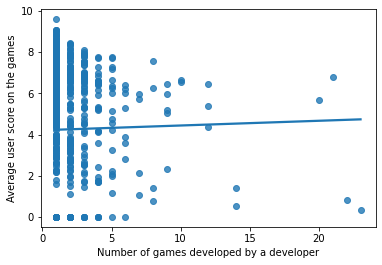

In [245]:
x = list(developer_count.values())
y1 = list(user_ratings.values())
sns.regplot(x, y1, ci=None)
plt.xlabel("Number of games developed by a developer")
plt.ylabel("Average user score on the games")

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Average metacritic score on the games')

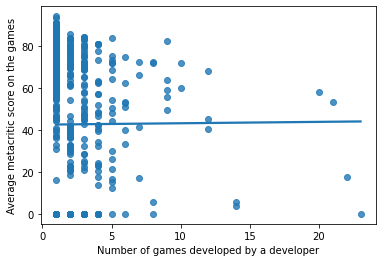

In [246]:
y2 = list(meta_ratings.values())
sns.regplot(x, y2, ci=None)
plt.xlabel("Number of games developed by a developer")
plt.ylabel("Average metacritic score on the games")

How do the popular genres vary over the year?

In [247]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', format='%Y/%m/%d')

In [248]:
months = df['release_date'].dt.month
months

1       3.0
2       5.0
3       4.0
4       3.0
5       3.0
       ... 
1635    1.0
1638    3.0
1639    8.0
1641    8.0
1642    8.0
Name: release_date, Length: 1400, dtype: float64

In [249]:
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [250]:
popular_genres = {}
for month in range(1,13):
    month_df = df[df['release_date'].dt.month == month]
    most_popular = []
    popular_rating = -1*np.inf
    for genre in genre_count:
        avg = np.mean(month_df[month_df['genres'].str.contains(genre)]['metascritic_score'])
        if avg > popular_rating:
            most_popular = [genre]
            popular_rating = avg
        elif avg==popular_rating:
            most_popular.append(genre)
    popular_genres[month_map[month]] = {'genres':most_popular, 'average metacritic score':popular_rating}
popular_genres

{'Jan': {'genres': ['Linear'], 'average metacritic score': 93.0},
 'Feb': {'genres': ['Sandbox'], 'average metacritic score': 89.0},
 'Mar': {'genres': ['Western-Style', 'PC-style RPG'],
  'average metacritic score': 89.0},
 'Apr': {'genres': ['Top-Down'], 'average metacritic score': 85.0},
 'May': {'genres': ['GeneralAction'], 'average metacritic score': 84.5},
 'Jun': {'genres': ['Virtual LifeSimulation'],
  'average metacritic score': 83.0},
 'Jul': {'genres': ['Stacking'], 'average metacritic score': 90.0},
 'Aug': {'genres': ['4X', '4XStrategy'], 'average metacritic score': 85.0},
 'Sep': {'genres': ['PinballAction', 'Pinball'],
  'average metacritic score': 89.0},
 'Oct': {'genres': ['Management', 'GovernmentStrategy', 'Government'],
  'average metacritic score': 87.0},
 'Nov': {'genres': ['4X', '4XStrategy'], 'average metacritic score': 87.0},
 'Dec': {'genres': ['Modern'], 'average metacritic score': 83.0}}

In [251]:
user_popular_genres = {}
for month in range(1,13):
    month_df = df[df['release_date'].dt.month == month]
    most_popular = []
    popular_rating = -1*np.inf
    for genre in genre_count:
        avg = np.mean(month_df[month_df['genres'].str.contains(genre)]['users_score'])
        if avg > popular_rating:
            most_popular = [genre]
            popular_rating = avg
        elif avg==popular_rating:
            most_popular.append(genre)
    user_popular_genres[month_map[month]] = {'genres':most_popular, 'average user score':popular_rating}
user_popular_genres

{'Jan': {'genres': ['Linear'], 'average user score': 8.6},
 'Feb': {'genres': ['Sandbox'], 'average user score': 8.7},
 'Mar': {'genres': ['GeneralAction Adventure'],
  'average user score': 8.633333333333333},
 'Apr': {'genres': ['Top-Down'], 'average user score': 8.3},
 'May': {'genres': ['GeneralAction Adventure'], 'average user score': 8.2},
 'Jun': {'genres': ['Metroidvania'], 'average user score': 8.9},
 'Jul': {'genres': ['Open-World'], 'average user score': 8.366666666666665},
 'Aug': {'genres': ['Open-WorldAction Adventure'], 'average user score': 8.3},
 'Sep': {'genres': ['Visual NovelAction', 'Visual NovelAction Adventure'],
  'average user score': 8.6},
 'Oct': {'genres': ['Visual NovelAdventure'], 'average user score': 8.4},
 'Nov': {'genres': ['Futuristic', 'FuturisticSports'],
  'average user score': 8.3},
 'Dec': {'genres': ['Modern'], 'average user score': 8.6}}

How does this trend in genres vary over the years?

In [252]:
all_years = np.sort(df['release_date'].dt.year.dropna().unique().astype(int))

In [253]:
yearly_popular_genres = {}
for year in all_years:
    year_df = df[df['release_date'].dt.year == year]
    most_popular = []
    popular_rating = -1*np.inf
    for genre in genre_count:
        avg = np.mean(year_df[year_df['genres'].str.contains(genre)]['metascritic_score'])
        if avg > popular_rating:
            most_popular = [genre]
            popular_rating = avg
        elif avg==popular_rating:
            most_popular.append(genre)
    yearly_popular_genres[year] = {'genres':most_popular, 'average metacritic score':popular_rating}
pprint(yearly_popular_genres)

{2003: {'average metacritic score': 72.0,
        'genres': ['Action',
                   'Shooter',
                   'Arcade',
                   'First-Person',
                   'Sci-Fi',
                   'Modern',
                   '']},
 2010: {'average metacritic score': 79.0,
        'genres': ['Action',
                   'Action Adventure',
                   'Adventure',
                   'Open-World',
                   'Modern',
                   '']},
 2011: {'average metacritic score': 78.0,
        'genres': ['Action',
                   'Action Adventure',
                   'Adventure',
                   'Open-World',
                   'Modern',
                   '']},
 2012: {'average metacritic score': 75.0,
        'genres': ['Action', 'Platformer', '2D', 'Puzzle', '']},
 2013: {'average metacritic score': 80.0,
        'genres': ['Action', 'General', 'Adventure', 'Point-and-Click', '']},
 2014: {'average metacritic score': 89.0,
        'genres': ['3D', 

Do metacritic scores and user scores align with each other?

<AxesSubplot:xlabel='metascritic_score', ylabel='users_score'>

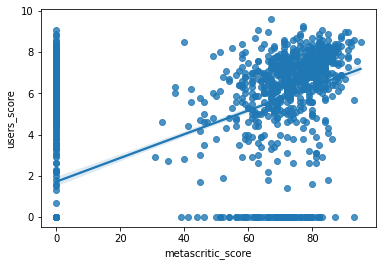

In [255]:
sns.regplot(data=df, x='metascritic_score', y='users_score')

In [256]:
df[df['metascritic_score']==0]

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,violence,esrb_rating,index,release_date,publishers,developers,rating,metascritic_score,users_score,genres
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,T,1632,2021-03-29,Idea Factory,Idea Factory,T,0.0,0.0,"Adventure, Visual Novel"
6,Monochrome Order,0,0,0,1,0,0,0,0,0,...,1,T,1516,2019-10-08,Kemco,Kemco,T,0.0,0.0,"Role-Playing, Japanese-Style"
8,Maquette,0,1,0,0,0,0,0,0,0,...,0,ET,1442,NaT,Annapurna Interactive,Graceful Decay,E10+,0.0,0.0,"Puzzle, General"
9,NBA LIVE 20,1,0,0,0,0,0,0,0,0,...,0,E,1596,NaT,Electronic Arts,Electronic Arts,E,0.0,0.0,"Sports, Team, Basketball, Sim"
11,Dungreed,0,1,0,0,0,0,0,0,0,...,0,ET,756,2020-10-27,Nicalis,TEAM HORAY,E10+,0.0,0.0,"Action, Platformer, 2D"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,White Noise 2,1,0,0,1,0,0,0,0,0,...,0,M,2920,2017-10-13,Milkstone Studios,Milkstone Studios,M,0.0,5.9,"Action Adventure, Survival"
1628,ACA NEOGEO FATAL FURY 3,1,0,0,1,0,0,0,0,0,...,0,T,58,2017-08-31,Hamster,Hamster,T,0.0,0.0,"Action, Fighting, 2D"
1632,Feral Fury,1,0,0,1,0,0,0,0,0,...,0,T,888,2017-08-30,Skandivania Games,Skandivania Games,T,0.0,0.0,"Action, Shooter, ""Shoot-Em-Up"", Top-Down"
1638,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,...,0,M,2065,2018-03-07,XSEED Games,"Tamsoft, Marvelous Inc.",M,0.0,5.9,"Action, Shooter, Third-Person, Arcade"


In [257]:
df[df['users_score']==0]

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,violence,esrb_rating,index,release_date,publishers,developers,rating,metascritic_score,users_score,genres
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,T,1632,2021-03-29,Idea Factory,Idea Factory,T,0.0,0.0,"Adventure, Visual Novel"
5,Monster Energy Supercross - The Official Video...,1,0,0,0,0,0,0,0,0,...,0,E,1527,2021-03-11,Koch Media,Milestone S.r.l,E,69.0,0.0,"Racing, Arcade, AutomobileRacing, Arcade, Auto..."
6,Monochrome Order,0,0,0,1,0,0,0,0,0,...,1,T,1516,2019-10-08,Kemco,Kemco,T,0.0,0.0,"Role-Playing, Japanese-Style"
7,Blightbound,1,0,0,0,1,0,0,0,0,...,0,T,361,2021-07-27,Devolver Digital,Ronimo Games,T,66.0,0.0,"Role-Playing, Action RPGRole-Playing, Action R..."
8,Maquette,0,1,0,0,0,0,0,0,0,...,0,ET,1442,NaT,Annapurna Interactive,Graceful Decay,E10+,0.0,0.0,"Puzzle, General"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,Just Dance 2018,1,0,0,0,0,0,0,0,0,...,0,ET,1272,NaT,Ubisoft,Ubisoft Paris,E10+,0.0,0.0,"Action, Rhythm, Dancing"
1628,ACA NEOGEO FATAL FURY 3,1,0,0,1,0,0,0,0,0,...,0,T,58,2017-08-31,Hamster,Hamster,T,0.0,0.0,"Action, Fighting, 2D"
1632,Feral Fury,1,0,0,1,0,0,0,0,0,...,0,T,888,2017-08-30,Skandivania Games,Skandivania Games,T,0.0,0.0,"Action, Shooter, ""Shoot-Em-Up"", Top-Down"
1641,Still Time,0,0,0,1,0,0,0,0,0,...,0,T,2313,2017-08-29,Alan Zucconi,Alan Zucconi,T,0.0,0.0,"Action, Platformer, 2D"


Which developers consistently get the highest ratings? Is there a trend in popular genres among these high rated developers?

In [258]:
all_developers = list(pd.Series(developer_count.keys()).unique())

In [259]:
developer_ratings = {}
for developer in all_developers:
    avg = np.mean(df[df['developers'].str.contains(developer)]['metascritic_score'])
    developer_ratings[developer] = avg
developer_ratings = dict(sorted(developer_ratings.items(), key=lambda item: item[1], reverse=True))

C:\Users\User\AppData\Local\Temp\ipykernel_12696\1002868910.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  avg = np.mean(df[df['developers'].str.contains(developer)]['metascritic_score'])


In [260]:
developer_ratings

{'Matt Makes Games Inc.': 94.0,
 'SCE Santa Monica': 93.0,
 'PLAYDEAD': 91.0,
 'Gearbox Software': 91.0,
 'Motion Twin': 91.0,
 'Bluepoint Games': 91.0,
 'Deck Nine Games': 82.0,
 'Jason Roberts': 80.0,
 'Black Lab Games': 76.0,
 'Slitherine': 76.0,
 'Brainseed Factory': 75.0,
 'Gears for Breakfast': 74.0,
 'Ice Flames': 73.0,
 'Boneloaf': 67.0,
 'Q Studios': 63.0,
 'Titutitech': 62.0,
 'KING Art': 60.0,
 'Hello There': 41.0,
 'Phantom 8': 37.0,
 'AREA35': 0.0,
 'Garage 227': 0.0,
 'Freshly Squeezed': 0.0,
 'Puuba': 0.0,
 'Invictus': 0.0,
 'Ionized Games': 0.0,
 'Surreal Games': 0.0,
 'Whirlybird Games': 0.0,
 'Digital Tentacle S.L.': 0.0,
 'Crackshell': 0.0,
 'Reptile': 0.0,
 'Digital Leisure': 0.0,
 'Kaia Studios': 0.0,
 'Clever Endeavour Games': 0.0,
 'Storm City Games': 0.0,
 'Boidae Games': 0.0,
 'Persistant Studios': 0.0,
 'Mythical City Games': 0.0,
 'RORTOS SRL': 0.0,
 'IGS (Taiwan)': nan,
 'SCE Japan Studio': 91.0,
 'JapanStudio': 90.0,
 'Level 91 Entertainment': 89.0,
 'Media

In [261]:
developer_userratings = {}
for developer in all_developers:
    avg = np.mean(df[df['developers'].str.contains(developer)]['users_score'])
    developer_userratings[developer] = avg
developer_userratings = dict(sorted(developer_userratings.items(), key=lambda item: item[1], reverse=True))

C:\Users\User\AppData\Local\Temp\ipykernel_12696\2562103469.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  avg = np.mean(df[df['developers'].str.contains(developer)]['users_score'])


In [262]:
developer_userratings

{'Gemdrops': 9.6,
 'Sucker Punch': 9.1,
 'Digital Works Entertainment': 9.1,
 'Tango Gameworks': 8.9,
 'Deck Nine Games': 8.1,
 'Gears for Breakfast': 8.0,
 'Hello There': 7.15,
 'Q Studios': 7.1,
 'Freshly Squeezed': 7.0,
 'Jason Roberts': 6.8,
 'Boneloaf': 6.7,
 'Brainseed Factory': 6.6,
 'Ice Flames': 6.6,
 'Phantom 8': 6.0,
 'KING Art': 5.3,
 'AREA35': 3.8,
 'Garage 227': 0.0,
 'Puuba': 0.0,
 'Invictus': 0.0,
 'Ionized Games': 0.0,
 'Surreal Games': 0.0,
 'Whirlybird Games': 0.0,
 'Digital Tentacle S.L.': 0.0,
 'Crackshell': 0.0,
 'Reptile': 0.0,
 'Digital Leisure': 0.0,
 'Kaia Studios': 0.0,
 'Clever Endeavour Games': 0.0,
 'Storm City Games': 0.0,
 'Black Lab Games': 0.0,
 'Slitherine': 0.0,
 'Boidae Games': 0.0,
 'Titutitech': 0.0,
 'Persistant Studios': 0.0,
 'Mythical City Games': 0.0,
 'RORTOS SRL': 0.0,
 'IGS (Taiwan)': nan,
 'Red Hook Studios': 9.1,
 'JapanStudio': 9.0,
 'Team Cherry': 8.9,
 'Lucas Pope': 8.8,
 'Sony Bend': 8.8,
 'Media Molecule': 8.7,
 'Purple Lamp Studios

In [263]:
meta_top10 = dict(list(developer_ratings.items())[:10])
meta_top10

{'Matt Makes Games Inc.': 94.0,
 'SCE Santa Monica': 93.0,
 'PLAYDEAD': 91.0,
 'Gearbox Software': 91.0,
 'Motion Twin': 91.0,
 'Bluepoint Games': 91.0,
 'Deck Nine Games': 82.0,
 'Jason Roberts': 80.0,
 'Black Lab Games': 76.0,
 'Slitherine': 76.0}

In [264]:
user_top10 = dict(list(developer_userratings.items())[:10])
user_top10

{'Gemdrops': 9.6,
 'Sucker Punch': 9.1,
 'Digital Works Entertainment': 9.1,
 'Tango Gameworks': 8.9,
 'Deck Nine Games': 8.1,
 'Gears for Breakfast': 8.0,
 'Hello There': 7.15,
 'Q Studios': 7.1,
 'Freshly Squeezed': 7.0,
 'Jason Roberts': 6.8}

Do the top 10 user rated developers develop more games with certain genres? How does this trend appear in top 10 metacritic rated developers?

In [265]:
fav_genres = {}
for developer in list(user_top10.keys()):
    dev_df = df[df['developers'].str.contains(developer)]
    genre_counts = col_unique_count(dev_df['genres'], True)
    top_3 = list(genre_counts.keys())[:3]
    fav_genres[developer] = top_3
pprint(fav_genres)

{'Deck Nine Games': ['Action Adventure', 'GeneralAction Adventure', 'General'],
 'Digital Works Entertainment': ['CompilationMiscellaneous',
                                 'Miscellaneous',
                                 'Compilation'],
 'Freshly Squeezed': ['Adventure', '3D', 'Third-Person'],
 'Gears for Breakfast': ['Action', 'Platformer', '3D'],
 'Gemdrops': ['General', 'Role-Playing', 'Action RPGRole-Playing'],
 'Hello There': ['Rhythm', 'Action', 'MusicAction'],
 'Jason Roberts': ['Puzzle', 'GeneralPuzzle', 'General'],
 'Q Studios': ['Role-Playing', 'Action RPGRole-Playing', 'Action RPG'],
 'Sucker Punch': ['General', 'Action Adventure', 'Open-World'],
 'Tango Gameworks': ['Action Adventure',
                     'SurvivalAction Adventure',
                     'Survival']}


In [266]:
fav_genres_meta = {}
for developer in list(meta_top10.keys()):
    dev_df = df[df['developers'].str.contains(developer)]
    genre_counts = col_unique_count(dev_df['genres'], True)
    top_3 = list(genre_counts.keys())[:3]
    fav_genres_meta[developer] = top_3
pprint(fav_genres_meta)

{'Black Lab Games': ['Turn-Based', 'General', 'Strategy'],
 'Bluepoint Games': ['Action Adventure', 'General'],
 'Deck Nine Games': ['Action Adventure', 'GeneralAction Adventure', 'General'],
 'Gearbox Software': ['Action', 'Shooter', 'First-Person'],
 'Jason Roberts': ['Puzzle', 'GeneralPuzzle', 'General'],
 'Matt Makes Games Inc.': ['Action', 'Platformer', '2D'],
 'Motion Twin': ['Platformer', '2DAction', 'Action'],
 'PLAYDEAD': ['Action', 'Platformer', '2D'],
 'SCE Santa Monica': ['Action Adventure', 'Linear'],
 'Slitherine': ['Turn-Based', 'General', 'Strategy']}


Correlation between different video game features and the ratings produced

In [267]:
df_ratings = df.drop(['title','console','esrb_rating','index','release_date','publishers','developers',
                      'rating','genres'], axis=1)

In [268]:
df_ratings.head(3)

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,metascritic_score,users_score
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,61.0,5.5
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,82.0,6.6
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,83.0,8.4


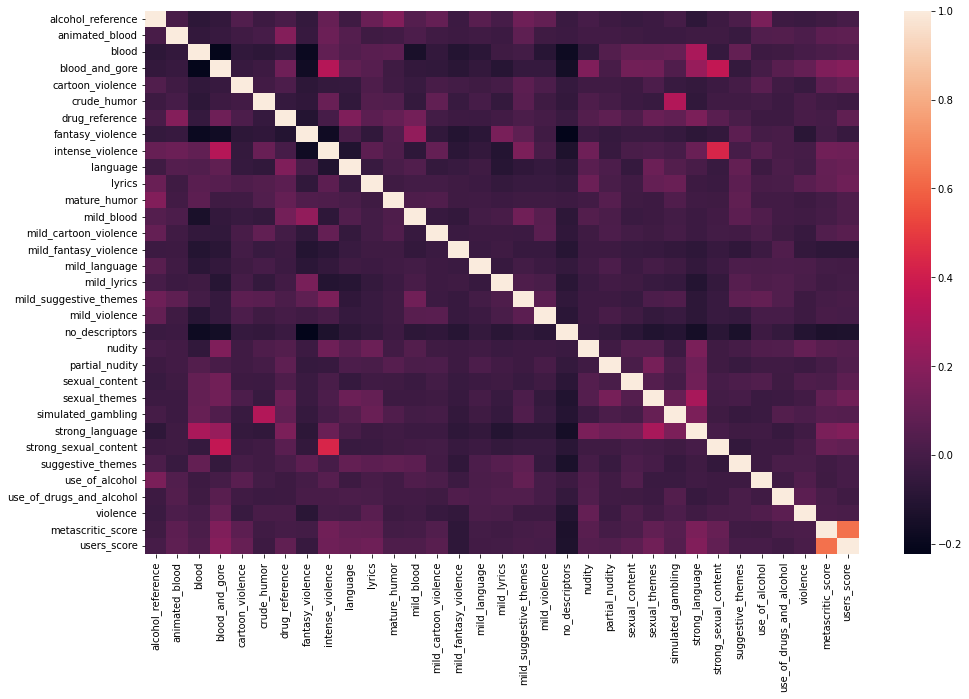

In [269]:
plt.figure(figsize=(16, 10))
corr_heatmap = sns.heatmap(df_ratings.corr(), annot=False)
plt.show()

What features have a negative correlation with ratings?

In [271]:
df_ratings.corr()[(df_ratings.corr()['metascritic_score']<0) & (df_ratings.corr()['users_score']<0)][['metascritic_score','users_score']]

,metascritic_score,users_score
crude_humor,-0.017203,-0.024133
fantasy_violence,-0.005004,-0.044614
mild_fantasy_violence,-0.071661,-0.071011
mild_language,-0.008560,-0.010781
mild_lyrics,-0.017607,-0.008654
no_descriptors,-0.128730,-0.125819
